<a href="https://colab.research.google.com/github/gopaps/Robotika_1103213098/blob/main/week%2011/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from google.colab import files

In [2]:
# Langkah 2: Membaca gambar
# Pastikan Anda sudah meng-upload gambar yang akan digunakan
# Jika gambar berada di Google Drive, gunakan path sesuai dengan lokasi gambar Anda.
# Mount Google Drive agar dapat mengakses file
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread('/content/drive/My Drive/dataset/Ford_Mustang.jpeg')  # Gantilah dengan path gambar Anda

Mounted at /content/drive


In [10]:
# 1. Ekstraksi Garis dengan Hough Transform

def hough_line_transform(image_path):
    # Baca gambar
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Hough Transform untuk mendeteksi garis
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Line Transform')
    plt.axis('off')
    plt.show()


In [4]:
# 2. Template Matching untuk Deteksi Objek

def template_matching(image_path, template_path):
    img = cv2.imread(image_path, 0)
    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]

    # Template Matching
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    img_color = cv2.imread(image_path)
    cv2.rectangle(img_color, top_left, bottom_right, (0, 0, 255), 2)

    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title('Template Matching')
    plt.axis('off')
    plt.show()


In [5]:

# 3. Pembuatan Pyramid Gambar

def image_pyramid(image_path):
    img = cv2.imread(image_path)
    plt.figure(figsize=(10, 5))

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Level {i}')
        plt.axis('off')
        img = cv2.pyrDown(img)

    plt.show()


In [6]:
# 4. Deteksi Lingkaran Menggunakan Hough Transform

def hough_circle_transform(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)

    # Hough Circle Transform
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Circle Transform')
    plt.axis('off')
    plt.show()

In [7]:
# 5. Ekstraksi Warna Dominan pada Gambar

def dominant_color_extraction(image_path, k=3):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flat = img.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img_flat)

    colors = kmeans.cluster_centers_.astype(int)
    counter = Counter(kmeans.labels_)
    total = sum(counter.values())

    plt.figure(figsize=(8, 6))
    plt.imshow([colors / 255.0])
    plt.title('Dominant Colors')
    plt.axis('off')
    plt.show()

In [8]:
# 6. Deteksi Kontur pada Gambar

def contour_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title('Contour Detection')
    plt.axis('off')
    plt.show()


Saving bola.jpeg to bola.jpeg


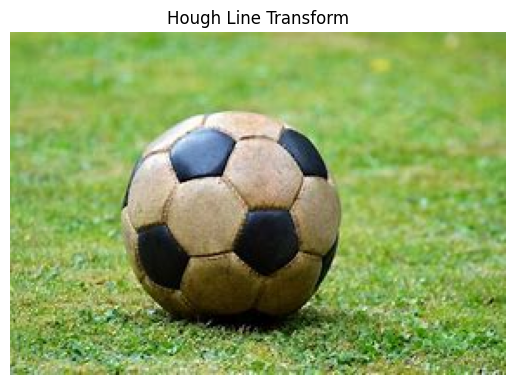

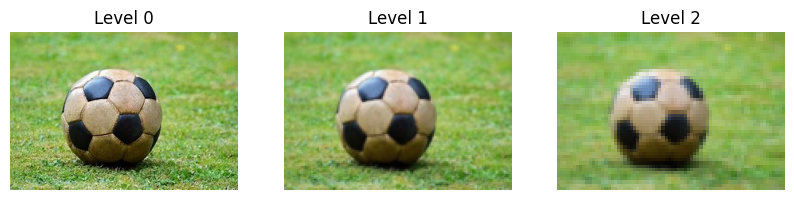

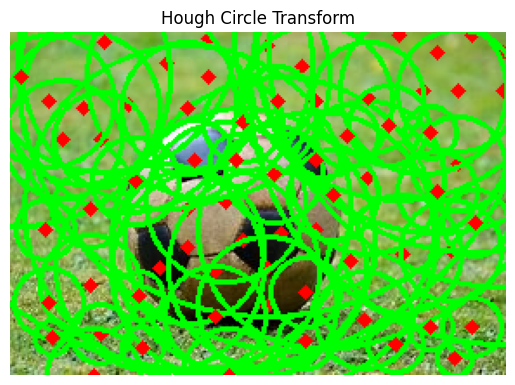

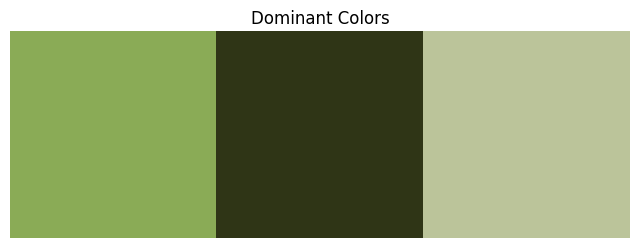

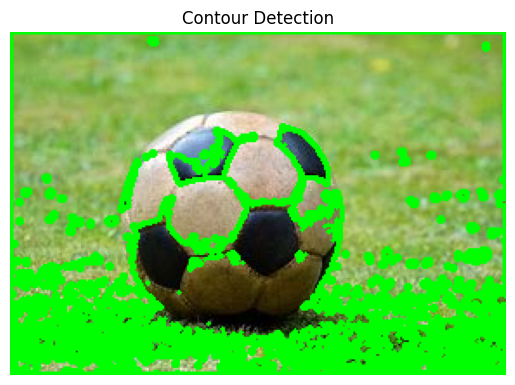

In [11]:
# Simulasi (Ubah path gambar sesuai kebutuhan)
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Jalankan setiap simulasi
hough_line_transform(image_path)
# Lakukan Template Matching dengan template_path sesuai
# template_matching(image_path, template_path)
image_pyramid(image_path)
hough_circle_transform(image_path)
dominant_color_extraction(image_path)
contour_detection(image_path)


# Analisis Gambar Hough Transform:
Objek Utama:

Gambar memperlihatkan bola sepak dengan pola pentagon dan hexagon klasik.
Latar belakang berupa rumput hijau memberikan kontras yang baik dengan warna bola.
Potensi Penerapan Hough Transform:

Hough Line Transform cocok digunakan untuk mendeteksi garis-garis lurus yang ada di dalam gambar.
Pada gambar bola ini, pola tepi polygon (garis-garis) pada bola dapat diekstraksi sebagai garis lurus.
Tantangan:

Garis-garis pada bola melengkung, sehingga Hough Line Transform mungkin akan mendeteksi sebagian garis lurus, terutama di area tepi polygon yang tampak datar.
Untuk mendeteksi kurva, Anda dapat menggunakan Hough Circle Transform atau edge detection lanjutan seperti Contour Detection.

# Pyramid Image Processing
Berdasarkan gambar Level 0, Level 1, dan Level 2, menunjukkan Image Pyramid, yaitu proses downscaling atau pengurangan resolusi gambar.

Analisis Gambar:
Level 0:

Ini adalah gambar asli dengan resolusi penuh.
Detail dan tepi objek (bola sepak) terlihat sangat jelas.
Level 1:

Ini adalah hasil downscaling pertama (setengah dari resolusi asli).
Bola masih terlihat jelas, tetapi detail halus (seperti tekstur rumput) mulai berkurang.
Downscaling biasanya menggunakan metode seperti Gaussian Pyramid.
Level 2:

Ini adalah hasil downscaling kedua (resolusi jauh lebih kecil).
Bola tampak kabur dan tekstur menjadi pixelated.
Proses ini memperkecil ukuran gambar sehingga hanya mempertahankan informasi bentuk dasar.
Hubungan dengan Template Matching:
Template Matching menggunakan pencocokan citra berdasarkan template atau pola kecil.
Jika template dan gambar target memiliki resolusi berbeda (seperti Level 0 dibandingkan Level 2), maka:
Kesulitan Matching: Deteksi akan kurang akurat karena resolusi rendah.
Solusi: Lakukan Template Matching pada berbagai level pyramid untuk meningkatkan akurasi.


# Insight Gambar: Hough Circle Transform
Analisis Hasil Transformasi:
Lingkaran Hijau:

Lingkaran hijau menggambarkan deteksi lingkaran oleh Hough Circle Transform.
Jumlah lingkaran yang terlalu banyak menunjukkan bahwa parameter deteksi tidak optimal.
Banyaknya lingkaran menunjukkan false positives (lingkaran yang tidak sesuai dengan objek sebenarnya).
Bola Sepak:

Bola sepak memiliki pola pentagon dan hexagon yang membingungkan deteksi karena tepi tajam di antara pola tersebut.
Lingkaran utama pada bola tidak terdeteksi dengan jelas akibat parameter transform yang kurang tepat.
Titik Merah:

Titik merah di sekitar lingkaran menunjukkan pusat-pusat lingkaran yang terdeteksi.
Akumulasi pusat lingkaran di sekitar bola menandakan bahwa area bola memiliki fitur yang menyerupai lingkaran.
Penyebab Banyaknya False Positives:
Parameter Transform:
param1 (Canny edge threshold) dan param2 (threshold voting) tidak optimal.
Nilai param2 yang rendah menyebabkan deteksi berlebih.
Tepi Kompleks:
Pola pentagon dan hexagon pada bola membuat deteksi tepi menghasilkan banyak edge yang salah.
Noise dari Background:
Area rumput memiliki tekstur yang menyebabkan noise tambahan dalam edge detection.

# Insight Gambar: Ekstraksi Warna Dominan
Gambar menunjukkan hasil ekstraksi warna dominan dari sebuah citra menggunakan metode K-Means Clustering.

Analisis Warna:
Tiga Warna Dominan:

Warna hijau terang (kiri) menunjukkan dominasi rumput pada latar belakang gambar.
Warna hijau tua kehitaman (tengah) kemungkinan besar berasal dari pola hitam bola sepak.
Warna hijau pucat (kanan) merupakan kombinasi dari rumput yang lebih terang atau efek pencahayaan pada gambar.
Distribusi Warna:

Ketiga warna ini dipilih sebagai representasi dominan dengan metode K-Means yang mengelompokkan piksel ke dalam 3 kluster (sesuai dengan k=3).
Ini menunjukkan bahwa latar belakang rumput mendominasi sebagian besar piksel dibandingkan dengan bola sepak itu sendiri.
Relevansi Ekstraksi Warna:
Aplikasi:
Ekstraksi warna dominan berguna untuk analisis citra, segmentasi objek, atau penentuan palet warna dalam desain.
Bola Sepak:
Dominasi warna hitam menunjukkan keberadaan pola bola.
Dominasi hijau menunjukkan latar belakang alami berupa rumput.


# Insight Gambar: Deteksi Kontur pada Bola Sepak
Gambar ini menunjukkan hasil deteksi kontur pada gambar bola sepak menggunakan OpenCV. Berikut analisisnya:

Analisis Gambar:
Kontur Hijau:

Kontur berwarna hijau telah berhasil mendeteksi tepi dari bola sepak dan sebagian dari pola pentagon serta heksagon pada bola.
Kontur juga mendeteksi sebagian area latar belakang rumput, terutama pada tekstur dengan perbedaan intensitas terang-gelap.
Latar Belakang:

Banyaknya kontur di area rumput dihasilkan oleh tekstur noise dan variasi kecerahan pada rumput, yang membuat threshold menghasilkan kontur tambahan.
Objek Utama (Bola):

Bagian utama bola terdeteksi dengan baik, terutama pada tepi pola hitam (pentagon dan hexagon).
Batas luar bola terlihat jelas karena perbedaan warna antara bola dan latar belakang.
Penyebab Kontur Berlebih:
Threshold yang Digunakan:

Threshold 127 membagi gambar ke dalam dua area biner: terang dan gelap.
Area rumput memiliki banyak variasi intensitas, sehingga threshold menghasilkan kontur tambahan.
Tekstur Latar Belakang:

Rumput memiliki tekstur kompleks, yang menyebabkan banyak edge (tepi) terdeteksi.
